# **Machine Learning Approach for Dry Beans Dataset**

## 0 - Introduction


*  PRIMARY OBJECTIVES

The assignment is designed to evaluate how well we have achieved the learning outcomes of the module:

• Proposing a machine learning framework for a given problem.

• Implementing best practices in creating/sourcing/preparing training and test data.

• Writing and documenting code to build a machine learning model

• Optimizing the performance of a machine learning model for a given problem.

• Evaluating and documenting the performance and behaviour of a given machine learning model, including analysing and critiquing it with respect to the given problem(s). 


*   THE DATASET

We will use the *Dry Beans Dataset* which includes images of 13,611 grains of 7 different registered dry beans taken with a high-resolution camera. A total of 16 features, 12 dimensions and 4 shape forms, were obtained from the grains.

* ATTRIBUTE INFORMATION
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: $(4\pi A)/(P^2)$

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermason, Horoz and Sira)

*   PUBLISHED RESEARCH STUDY BACKGROUND

The publication that we will be considering is:
  > Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. Computers and Electronics in Agriculture, 174, https://doi.org/10.1016/j.compag.2020.105507

## 1 - Loading the data

*   DOWNLOAD THE DATASET

**Dataset (Dry Bean dataset)can be downloaded from** 
https://archive-beta.ics.uci.edu/dataset/602/dry+bean+dataset

* THE DATASET FOLDER

You can now load the data from the zipped *Pistachio_Image_Dataset* folder. The folder has three sets of data (and so, three subfolders):

  1. *Dry_Bean_Dataset.arff* - i.e., the *Features Version*, with 16 features extracted from the image data, represented as a feature vector and class provided in .arff file formats.
  2.   *Dry_Bean_Dataset.txt* - i.e., the breif information about the dataset.
  3.  *Dry_Bean_Dataset.xlsx* - i.e., the *Features Version*, with 16 features extracted from the image data, represented as a feature vector and class provided in .xlsx file formats.

I will load data from *Dry_Bean_Dataset.xlsx* file.

#### Mounting Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing the Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
use_cuda=torch.cuda.is_available()
if use_cuda:
  print("GPU acceleration enabled")
else:
  print("GPU acceleration NOT enabled.  If using Colab, have you changed the runtype type and selected GPU as the hardware accelerator?")
device=torch.device("cuda" if use_cuda else "cpu")
print(device)

GPU acceleration NOT enabled.  If using Colab, have you changed the runtype type and selected GPU as the hardware accelerator?
cpu


#### UNZIPPING THE FOLDER

In [ ]:
from zipfile import ZipFile

# specifying the full path for the uploaded zipped dataset file
#data_folder_full_path = "/content/DryBeanDataset.zip"
data_folder_full_path = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/DryBeanDataset.zip"
  
# loading the zip file and creating a zip object
with ZipFile(data_folder_full_path, 'r') as datasetFolderObject:
  
    # and then extracting the contents to the main directory
    datasetFolderObject.extractall(path="/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment")

#### LOADING THE DATA FROM .xlsx FILE

In [ ]:
# specifying the full path for the unzipped xlsx file of the dataset
#file_path = "DryBeanDataset/Dry_Bean_Dataset.xlsx"
file_path = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/DryBeanDataset/Dry_Bean_Dataset.xlsx"

# loading the data from the xls file
bean_df = pd.read_excel(file_path)
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# outputing the shape of the loaded data to the screen
print("\n The dataset has shape: "+str(bean_df.shape))


 The dataset has shape: (13611, 17)


In [ ]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
bean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [ ]:
bean_df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
bean_df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

As it is observed from the above class distribution, `Bombay` class has the lowest number of seed samples (522) and `Dermason` has the most observations (3546).

## 2 - Data Exploration

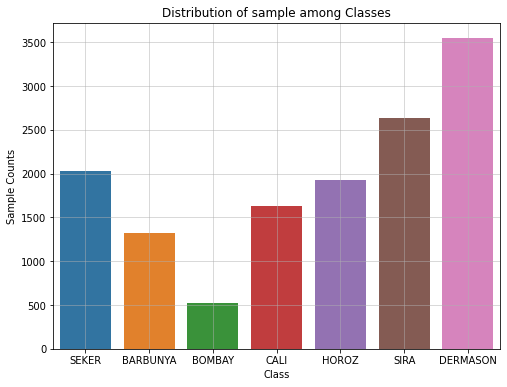

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = bean_df, x ='Class')
plt.xlabel('Class')
plt.ylabel('Sample Counts')
plt.title('Distribution of sample among Classes')
plt.xticks(rotation = 0)
plt.grid(True, alpha = 0.6)

plt.show()

In [ ]:
def box_plot(df, feat1,feat2,feat3,feat4):
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(221)
  df1=df.loc[:,('Class',feat1)]
  df1.Class=df1.Class.astype("category")
  #plt.xticks(rotation=40)
  sns.boxplot(x='Class',y=feat1, data = df1)
  plt.ylabel(feat1)
  plt.xlabel('Class')
  plt.title('Boxplot of ' + feat1)
  plt.grid(True, alpha = 0.6)
  plt.tight_layout()

  plt.subplot(222)
  df2=df.loc[:,('Class',feat2)]
  df2.Class=df2.Class.astype("category")
  #plt.xticks(rotation=40)
  sns.boxplot(x='Class',y=feat2, data = df2)
  plt.ylabel(feat2)
  plt.xlabel('Class')
  plt.title('Boxplot of ' + feat2)
  plt.grid(True, alpha = 0.6)
  plt.tight_layout()

  plt.subplot(223)
  df3=df.loc[:,('Class',feat3)]
  df3.Class=df3.Class.astype("category")
  #plt.xticks(rotation=40)
  sns.boxplot(x='Class',y=feat3, data = df3)
  plt.ylabel(feat3)
  plt.xlabel('Class')
  plt.title('Boxplot of ' + feat3)
  plt.grid(True, alpha = 0.6)
  plt.tight_layout()

  plt.subplot(224)
  df4=df.loc[:,('Class',feat4)]
  df4.Class=df4.Class.astype("category")
  #plt.xticks(rotation=40)
  sns.boxplot(x='Class',y=feat4, data = df4)
  plt.ylabel(feat4)
  plt.xlabel('Class')
  plt.title('Boxplot of ' + feat4)
  plt.grid(True, alpha = 0.6)
  plt.tight_layout()

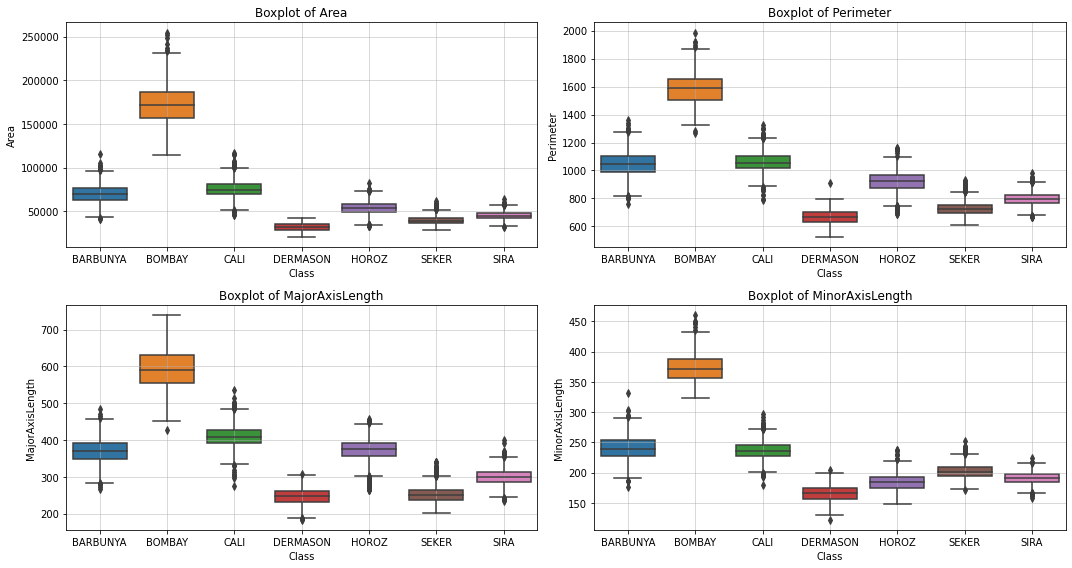

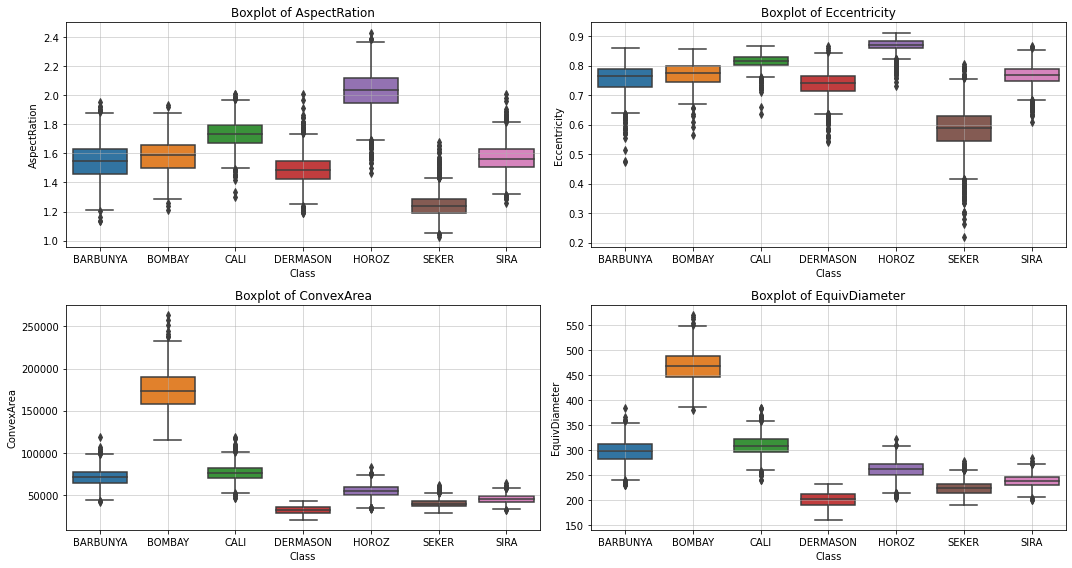

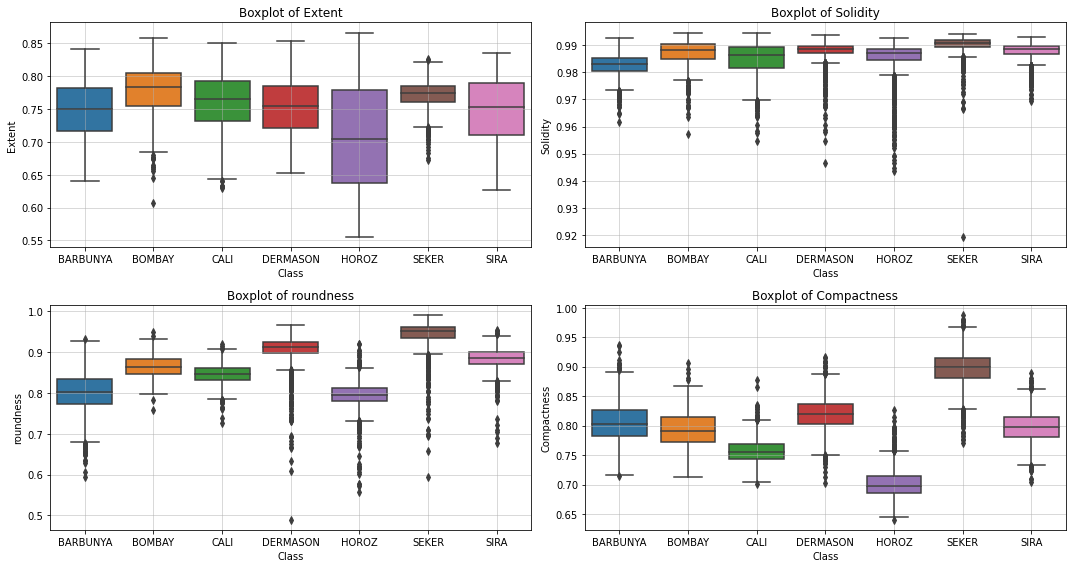

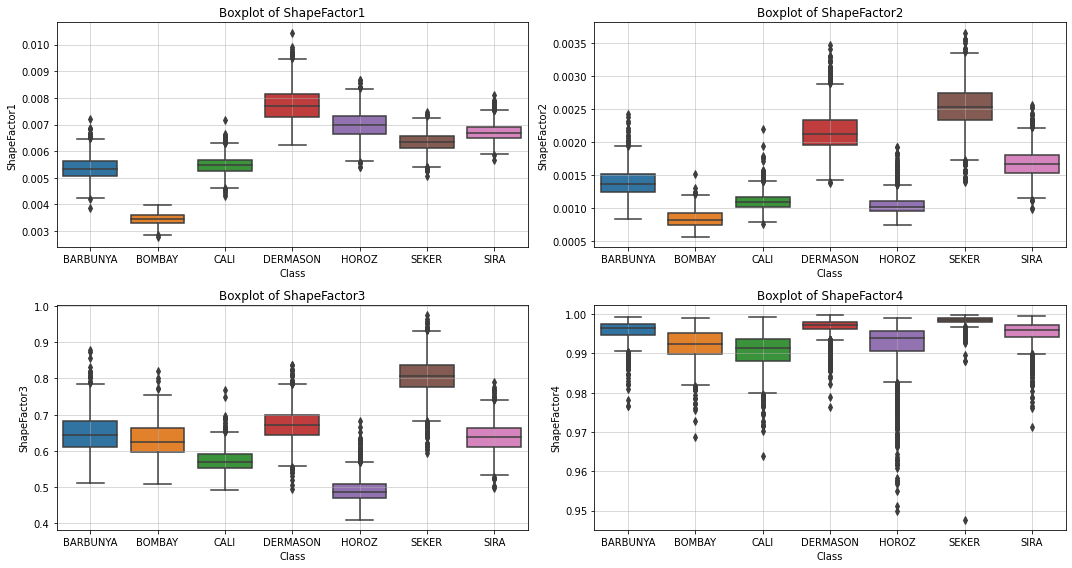

In [ ]:
box_plot(bean_df, 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength')
box_plot(bean_df, 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter')
box_plot(bean_df, 'Extent', 'Solidity', 'roundness', 'Compactness')
box_plot(bean_df, 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4')

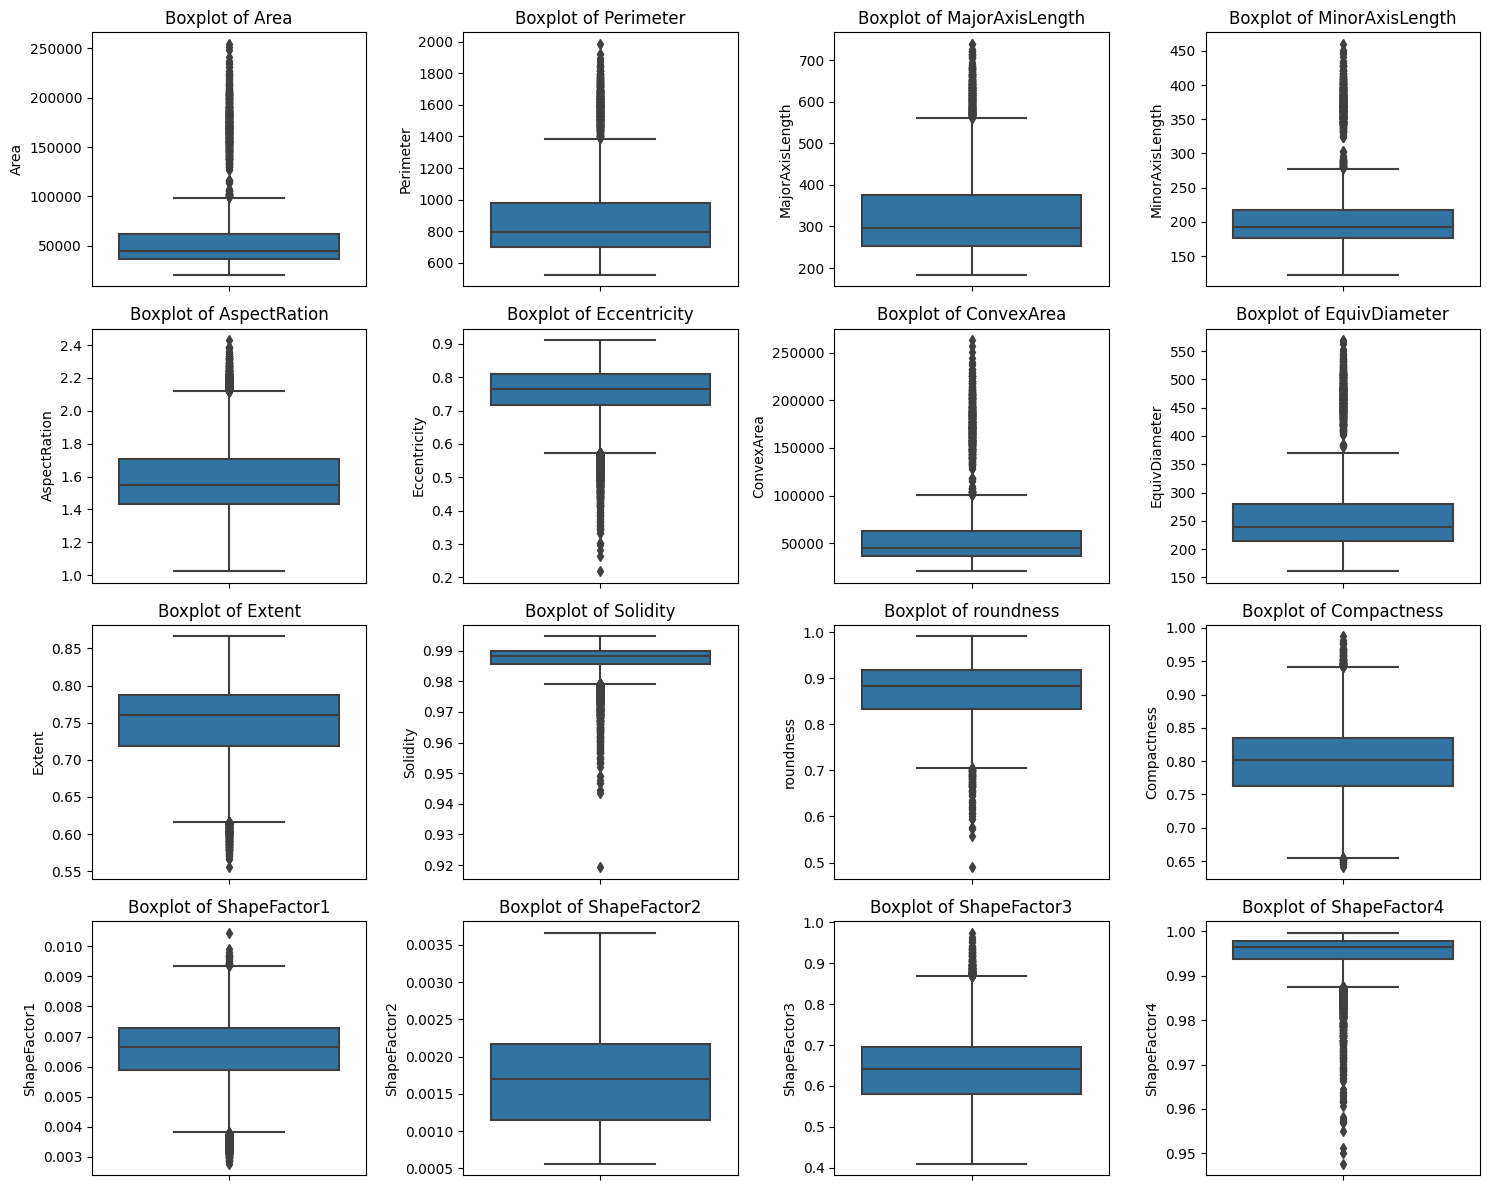

In [ ]:
feat_cols = bean_df.drop(columns=['Class']).columns
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for feature, subplot in zip(feat_cols, ax.flatten()):
    sns.boxplot(y= bean_df[feature], ax=subplot).set(title = "Boxplot of "+ feature)
    
plt.tight_layout()

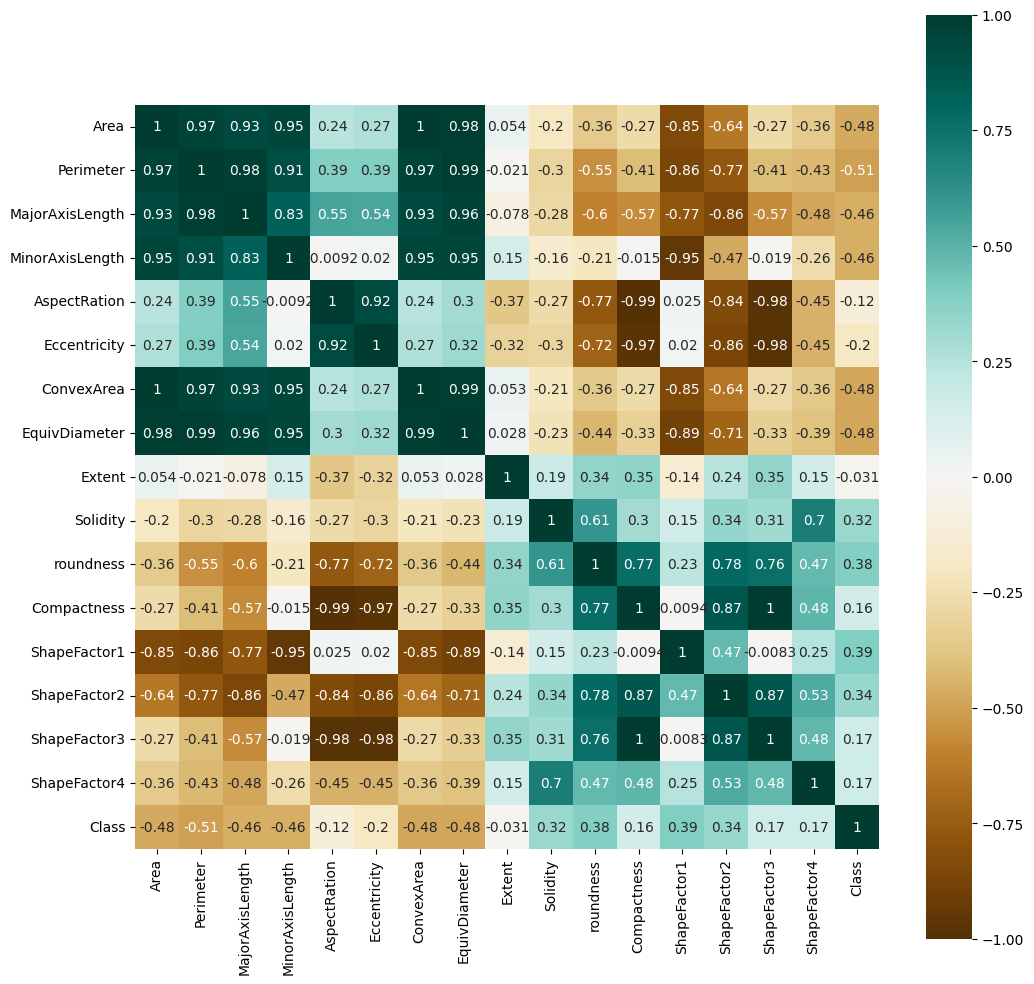

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(bean_df.corr("pearson"),vmin=-1, vmax=1,cmap='BrBG',annot=True, square=True)
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/correlation.jpg', bbox_inches='tight')

## 3 - Preprocessing I - Recoding the labels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

The labels provided in data are still in their nominal form. These need to be changed to numerical form to apply machine learning algorithms.

In [ ]:

le = LabelEncoder()
bean_df['Class'] = le.fit_transform(bean_df['Class'])
bean_df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [ ]:
# we can check the encoding classes
le.inverse_transform(bean_df['Class'].unique())

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
bean_df['Class']

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int64

In [ ]:
features = bean_df.drop('Class', axis = 1)      # It includes total 16 features except Class
target = bean_df['Class']                       # Class is the target labels in the dataset

## 4 - Splitting data into training, validation, and test sets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

#### SPLITTING THE DATASET

In [ ]:
# setting a seed to be used for any function that explicitly makes use of a random number generator.
random_seed = 111

#first randomly splitting the data 80/20 into training and test sets
feats_train, feats_test, target_train, target_test = train_test_split(features, target, test_size = 0.20, stratify = target, 
                                                                      shuffle=True, random_state = random_seed)

# then further splitting the training set into training and validation sets
feats_train, feats_val, target_train, target_val = train_test_split(feats_train, target_train, test_size = 0.10, 
                                                                    stratify = target_train, shuffle=True, random_state = random_seed)

#### CHECKING THE CLASSES DISTRIBUTION

In [ ]:
# creating a function for histogram plots for the labels in the dataset
label_types = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']

def distribution_plot(data, label):
  plt.figure()
  plt.hist(data, bins=[0, 1, 2,3,4,5,6,7], align='left', edgecolor='black', linewidth=1.2)
  plt.title(label)
  plt.xlabel("Classes")
  plt.ylabel("Frequency")
  plt.xticks(np.unique(data), label_types)
  plt.xlim(left=min(np.unique(data))-1, right=max(np.unique(data))+1)
  plt.grid(True, alpha = 0.6)
  plt.show()
  print('\n')

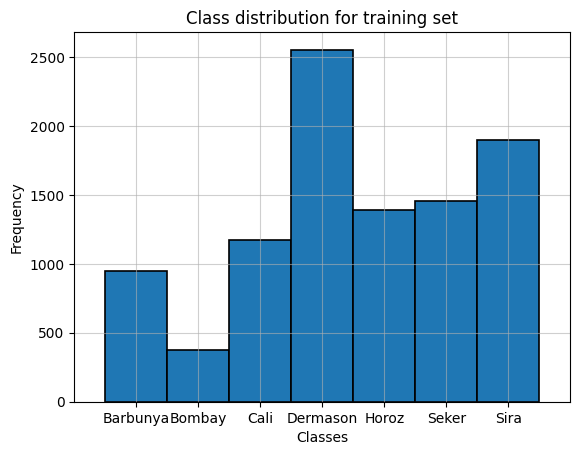

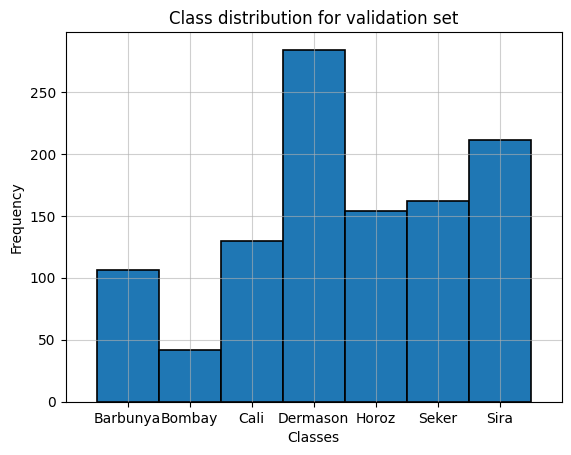

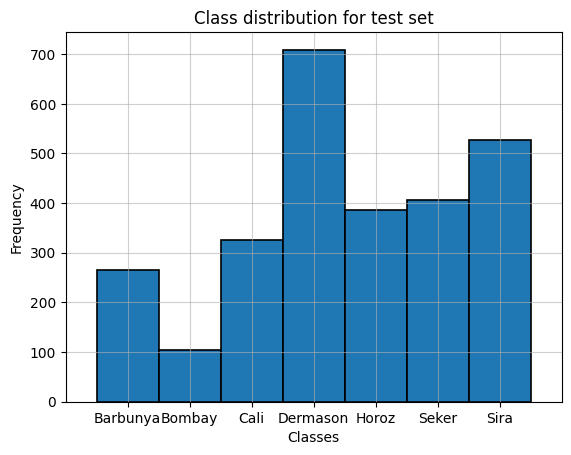

In [ ]:
# showing the distribution of the labels in the final training, validation, and test sets
distribution_plot(target_train, 'Class distribution for training set')
distribution_plot(target_val, 'Class distribution for validation set')
distribution_plot(target_test, 'Class distribution for test set')

## 5 - Preprocessing II - Normalizing the features

We use `fit()` and `transform()` or `fit_transform()` on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use `transform()` on the test data because we use the scaling paramaters learned on the train data to scale the test data.

In [ ]:
# defining function to normalize features using Standard Scaling
# normalize the training, validation and testing data feature vector
scaler = StandardScaler()
scaled_feats_train = scaler.fit_transform(feats_train)   # Fit and transform the training set features
scaled_feats_val = scaler.transform(feats_val)        # Only transforming the validation set features
scaled_feats_test = scaler.transform(feats_test)      # Only transforming the Test set features

## 6 - Model Development

### 6.1 - MLP Classifier

In [ ]:
# Building MLPClassifier
# hyperparameter tuning
alpha_options = [0.005, 0.001, 0.05, 0.01, 0.1]
hidden_layer_size = [(50,100,50), (100, 100), (100,)]
best_a = 0.1
best_size = (100,)
best_perf = 0

for a in alpha_options:
  for size in hidden_layer_size:
    print("\n for alpha = "+str(a)+ " and for hidden_layer_sizes = "+str(size)+"...")
    model_mlp= MLPClassifier(hidden_layer_sizes = size, alpha=a, max_iter=500, activation='relu', solver='adam', random_state=random_seed)
    model_mlp.fit(scaled_feats_train, target_train)
    val_pred = model_mlp.predict(scaled_feats_val)

    avg_f1_score = f1_score(target_val, val_pred, average='macro')

    if avg_f1_score > best_perf:
      best_a = a
      best_size = size
      best_perf = avg_f1_score

print('\n The optimal alpha value for this data is: '+str(best_a))
print('\n The optimal hidden layer size for this data is: '+str(best_size))

# Use the optimized hyperparameter to train the final model
model_mlp= MLPClassifier(hidden_layer_sizes = best_size, alpha=best_a, max_iter=500, activation='relu', solver='adam', random_state=random_seed)
model_mlp.fit(scaled_feats_train, target_train)


 for alpha = 0.005 and for hidden_layer_sizes = (50, 100, 50)...

 for alpha = 0.005 and for hidden_layer_sizes = (100, 100)...

 for alpha = 0.005 and for hidden_layer_sizes = (100,)...

 for alpha = 0.001 and for hidden_layer_sizes = (50, 100, 50)...

 for alpha = 0.001 and for hidden_layer_sizes = (100, 100)...

 for alpha = 0.001 and for hidden_layer_sizes = (100,)...

 for alpha = 0.05 and for hidden_layer_sizes = (50, 100, 50)...

 for alpha = 0.05 and for hidden_layer_sizes = (100, 100)...

 for alpha = 0.05 and for hidden_layer_sizes = (100,)...

 for alpha = 0.01 and for hidden_layer_sizes = (50, 100, 50)...

 for alpha = 0.01 and for hidden_layer_sizes = (100, 100)...

 for alpha = 0.01 and for hidden_layer_sizes = (100,)...

 for alpha = 0.1 and for hidden_layer_sizes = (50, 100, 50)...

 for alpha = 0.1 and for hidden_layer_sizes = (100, 100)...

 for alpha = 0.1 and for hidden_layer_sizes = (100,)...

 The optimal alpha value for this data is: 0.01

 The optimal hidden la

MLPClassifier(alpha=0.01, max_iter=500, random_state=111)

In [ ]:
# Evaluate the trained model using the test set
# see prediction on the test data
test_predictions_mlp = model_mlp.predict(scaled_feats_test)

#### EVALUATION OF MLP CLASSIFIER


 The F1 scores for each of the classes are: [0.93436293 1.         0.94242424 0.92176387 0.95730918 0.94621027
 0.88240828]

 The average F1 score is: 0.9406398254741216

 The overall accuracy is: 0.9294895336026442

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.96      0.91      0.93       265
      Bombay       1.00      1.00      1.00       104
        Cali       0.93      0.95      0.94       326
    Dermason       0.93      0.91      0.92       709
       Horoz       0.96      0.96      0.96       386
       Seker       0.94      0.95      0.95       406
        Sira       0.88      0.89      0.88       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723


----------- Confusion Matrix --------------


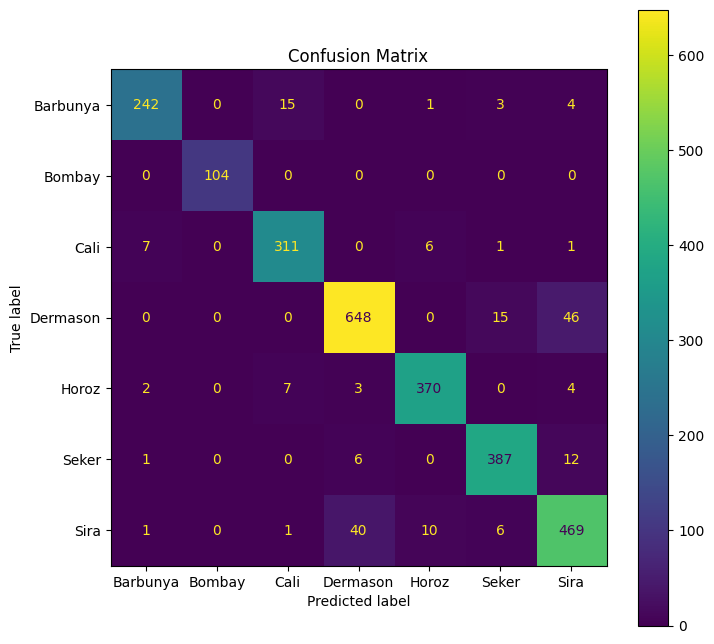

In [ ]:
avg_f1_score_mlp = f1_score(target_test, test_predictions_mlp, average='macro')
f1_scores_mlp = f1_score(target_test, test_predictions_mlp, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_mlp))
print('\n The average F1 score is: '+str(avg_f1_score_mlp))


acc_mlp = accuracy_score(target_test, test_predictions_mlp)
print('\n The overall accuracy is: '+str(acc_mlp))

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_mlp, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_mlp = confusion_matrix(target_test, test_predictions_mlp)
disp = ConfusionMatrixDisplay(cm_mlp, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/confusion_matrix_mlp.jpg', bbox_inches='tight')
plt.show()

#### Creating lists to store accuracy and f1 score of all models

In [ ]:
# creating lists to store accuracy and f1 score of all models
accuracy, f1score = [], []
f1_per_class = {}
accuracy.append(acc_mlp)
f1score.append(avg_f1_score_mlp)
f1_per_class['MLP Classifier'] = f1_scores_mlp


### 6.2 - Logistic Regression Classifier

In [ ]:
# Building Logistic Regression Classifier
# hyperparameter tuning
c_options = [0.001, 0.01, 1.0, 5.0, 10.0]
solver_options = ['lbfgs', 'newton-cg', 'sag', 'saga']
class_weight_options = [None, 'balanced']
best_c = 0.001
best_solver = 'lbfgs'
best_class = None
best_perf = 0

for c in c_options:
  for s in solver_options:
    for cl in class_weight_options:
      print("\n for C = "+str(c)+ ", for solver = "+str(s)+ " and for class_weight = "+str(cl)+"...")
      model_lr= LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=c, class_weight = cl, solver = s, max_iter = 200, verbose=0, random_state=random_seed)
      model_lr.fit(scaled_feats_train, target_train)
      val_pred = model_lr.predict(scaled_feats_val)

      avg_f1_score = f1_score(target_val, val_pred, average='macro')

      if avg_f1_score > best_perf:
        best_c = c
        best_solver = s
        best_class = cl
        best_perf = avg_f1_score

print('\n The optimal C value for this data is: '+str(best_c))
print('\n The best solver for this data is: '+str(best_solver))
print('\n The optimal class weight for this data is: '+str(best_class))

# Use the optimized hyperparameter to train the final model
model_lr= LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=best_c, class_weight = best_class, solver = best_solver, max_iter = 200, verbose=0, random_state=random_seed)
model_lr.fit(scaled_feats_train, target_train)


 for C = 0.001, for solver = lbfgs and for class_weight = None...

 for C = 0.001, for solver = lbfgs and for class_weight = balanced...

 for C = 0.001, for solver = newton-cg and for class_weight = None...

 for C = 0.001, for solver = newton-cg and for class_weight = balanced...

 for C = 0.001, for solver = sag and for class_weight = None...

 for C = 0.001, for solver = sag and for class_weight = balanced...

 for C = 0.001, for solver = saga and for class_weight = None...

 for C = 0.001, for solver = saga and for class_weight = balanced...

 for C = 0.01, for solver = lbfgs and for class_weight = None...

 for C = 0.01, for solver = lbfgs and for class_weight = balanced...

 for C = 0.01, for solver = newton-cg and for class_weight = None...

 for C = 0.01, for solver = newton-cg and for class_weight = balanced...

 for C = 0.01, for solver = sag and for class_weight = None...

 for C = 0.01, for solver = sag and for class_weight = balanced...

 for C = 0.01, for solver = saga 

LogisticRegression(C=5.0, max_iter=200, random_state=111, solver='saga')

In [ ]:
# Evaluate the trained model using the test set
# see prediction on the test data
test_predictions_lr = model_lr.predict(scaled_feats_test)

#### EVALUATION OF LOGISTIC REGRESSION CLASSIFIER


 The F1 scores for each of the classes are: [0.9245283  1.         0.94478528 0.92759857 0.95274585 0.93680297
 0.88141923]

 The average F1 score is: 0.938268600272048

 The overall accuracy is: 0.9280205655526992

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.92      0.92      0.92       265
      Bombay       1.00      1.00      1.00       104
        Cali       0.94      0.94      0.94       326
    Dermason       0.94      0.91      0.93       709
       Horoz       0.94      0.97      0.95       386
       Seker       0.94      0.93      0.94       406
        Sira       0.87      0.90      0.88       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723


----------- Confusion Matrix --------------


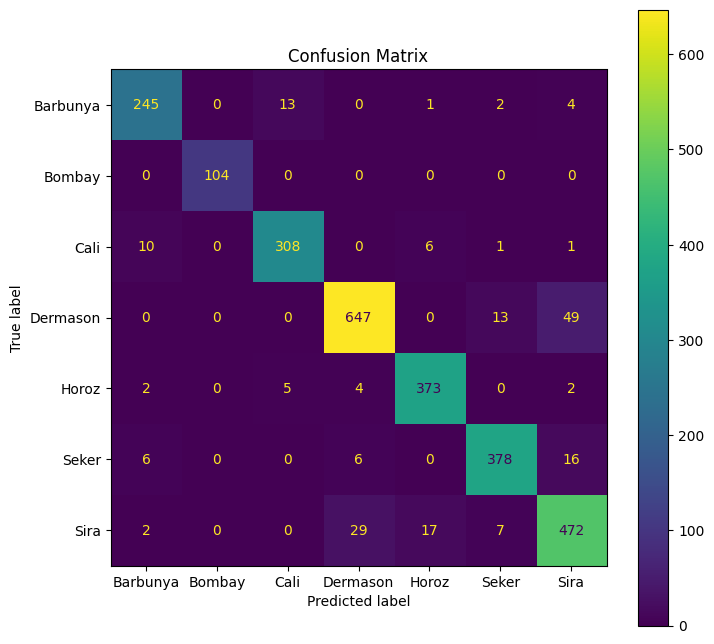

In [ ]:
avg_f1_score_lr = f1_score(target_test, test_predictions_lr, average='macro')
f1_scores_lr = f1_score(target_test, test_predictions_lr, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_lr))
print('\n The average F1 score is: '+str(avg_f1_score_lr))


acc_lr = accuracy_score(target_test, test_predictions_lr)
print('\n The overall accuracy is: '+str(acc_lr))

# store accuracy and f1-score
accuracy.append(acc_lr)
f1score.append(avg_f1_score_lr)
f1_per_class['Logistic Regression'] = f1_scores_lr

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_lr, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_lr = confusion_matrix(target_test, test_predictions_lr)
disp = ConfusionMatrixDisplay(cm_lr, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.3 - KNeighbors Classifier

In [ ]:
# Building KNeighbors Classifier
# hyperparameter tuning
n_options = [2,3,4,5,6]
leaf_size_options = [10,20,30,40]
weight_options = ['uniform', 'distance']
p_options = [1,2]
best_n = 3
best_leaf = 10
best_w = 'uniform'
best_p = 2
best_perf = 0

for n in n_options:
  for leaf in leaf_size_options:
    for w in weight_options:
      for power in p_options:
        print("\n for n_neighbors = "+str(n)+ ", for leaf_size = "+str(leaf)+ ", for weights = "+str(w)+ " and for p = "+str(power)+"...")
        model_knc= KNeighborsClassifier(algorithm = 'auto', leaf_size = leaf, n_neighbors = n, p = power, weights = w, metric='minkowski')
        model_knc.fit(scaled_feats_train, target_train)
        val_pred = model_knc.predict(scaled_feats_val)

        avg_f1_score = f1_score(target_val, val_pred, average='macro')

        if avg_f1_score > best_perf:
          best_n = n
          best_leaf = leaf
          best_w = w
          best_p = power
          best_perf = avg_f1_score

print('\n The optimal n_neighbors value for this data is: '+str(best_n))
print('\n The best leaf_size for this data is: '+str(best_leaf))
print('\n The optimal weights for this data is: '+str(best_w))
print('\n The best p for this data is: '+str(best_p))

# Use the optimized hyperparameter to train the final model
model_knc= KNeighborsClassifier(algorithm = 'auto', leaf_size = best_leaf, n_neighbors = best_n, p = best_p, weights = best_w, metric='minkowski')
model_knc.fit(scaled_feats_train, target_train)


 for n_neighbors = 2, for leaf_size = 10, for weights = uniform and for p = 1...

 for n_neighbors = 2, for leaf_size = 10, for weights = uniform and for p = 2...

 for n_neighbors = 2, for leaf_size = 10, for weights = distance and for p = 1...

 for n_neighbors = 2, for leaf_size = 10, for weights = distance and for p = 2...

 for n_neighbors = 2, for leaf_size = 20, for weights = uniform and for p = 1...

 for n_neighbors = 2, for leaf_size = 20, for weights = uniform and for p = 2...

 for n_neighbors = 2, for leaf_size = 20, for weights = distance and for p = 1...

 for n_neighbors = 2, for leaf_size = 20, for weights = distance and for p = 2...

 for n_neighbors = 2, for leaf_size = 30, for weights = uniform and for p = 1...

 for n_neighbors = 2, for leaf_size = 30, for weights = uniform and for p = 2...

 for n_neighbors = 2, for leaf_size = 30, for weights = distance and for p = 1...

 for n_neighbors = 2, for leaf_size = 30, for weights = distance and for p = 2...

 for n_ne

KNeighborsClassifier(leaf_size=10, n_neighbors=6, weights='distance')

In [ ]:
# Evaluate the trained model using the test set
# see prediction on the test data
test_predictions_knc = model_knc.predict(scaled_feats_test)

#### EVALUATION OF K-NEIGHBORS CLASSIFIER


 The F1 scores for each of the classes are: [0.92898273 1.         0.94063927 0.91233072 0.95128205 0.93695921
 0.85955056]

 The average F1 score is: 0.9328206481142661

 The overall accuracy is: 0.919573999265516

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.95      0.91      0.93       265
      Bombay       1.00      1.00      1.00       104
        Cali       0.93      0.95      0.94       326
    Dermason       0.92      0.90      0.91       709
       Horoz       0.94      0.96      0.95       386
       Seker       0.94      0.93      0.94       406
        Sira       0.85      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


----------- Confusion Matrix --------------


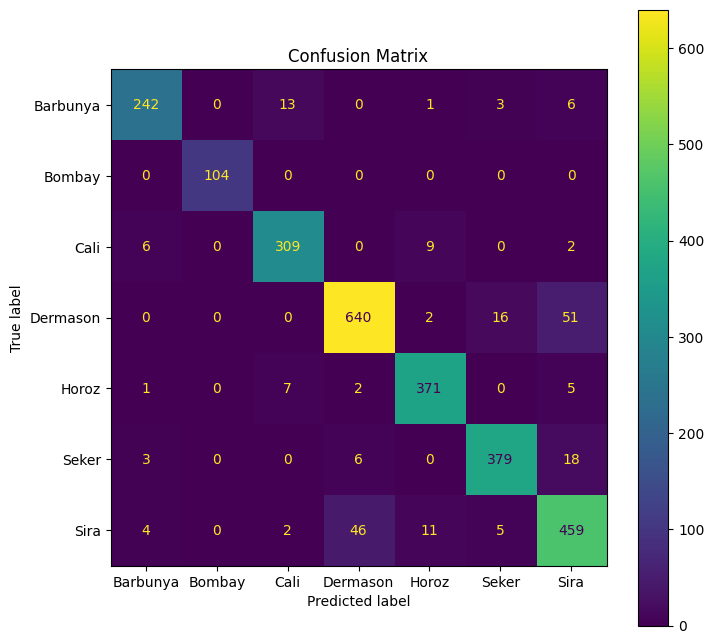

In [ ]:
avg_f1_score_knc = f1_score(target_test, test_predictions_knc, average='macro')
f1_scores_knc = f1_score(target_test, test_predictions_knc, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_knc))
print('\n The average F1 score is: '+str(avg_f1_score_knc))


acc_knc = accuracy_score(target_test, test_predictions_knc)
print('\n The overall accuracy is: '+str(acc_knc))

#store accuracy and f1-score
accuracy.append(acc_knc)
f1score.append(avg_f1_score_knc)
f1_per_class['K-Neighbors Classifier'] = f1_scores_knc

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_knc, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_knc = confusion_matrix(target_test, test_predictions_knc)
disp = ConfusionMatrixDisplay(cm_knc, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.4 - Gaussian Naive Bayes Classifier

In [ ]:
# GaussianNB classifier
# hyperparameter tuning
smoothing_options =  [1e-11, 1e-10, 1e-9]
best_s = 1e-9
best_perf = 0

for s in smoothing_options:
    print("\n for var_smoothing ="+str(s)+"...")
    model_gnb= GaussianNB(var_smoothing = s)
    model_gnb.fit(scaled_feats_train, target_train)
    val_pred = model_gnb.predict(scaled_feats_val)

    avg_f1_score = f1_score(target_val, val_pred, average='macro')

    if avg_f1_score > best_perf:
      best_s = s
      best_perf = avg_f1_score

print('\n The optimal var_smoothing value for this data is: '+str(best_s))

# Use the optimized hyperparameter to train the final model
model_gnb= GaussianNB(var_smoothing = best_s)
model_gnb.fit(scaled_feats_train, target_train)


 for var_smoothing =1e-11...

 for var_smoothing =1e-10...

 for var_smoothing =1e-09...

 The optimal var_smoothing value for this data is: 1e-11


GaussianNB(var_smoothing=1e-11)

#### EVALUATION OF GAUSSIAN NB CLASSIFIER


 The F1 scores for each of the classes are: [0.8452381  0.99047619 0.89450223 0.90935673 0.94803549 0.92176039
 0.85608856]

 The average F1 score is: 0.9093510971042473

 The overall accuracy is: 0.9015791406536908

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.89      0.80      0.85       265
      Bombay       0.98      1.00      0.99       104
        Cali       0.87      0.92      0.89       326
    Dermason       0.94      0.88      0.91       709
       Horoz       0.93      0.97      0.95       386
       Seker       0.92      0.93      0.92       406
        Sira       0.83      0.88      0.86       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723


----------- Confusion Matrix --------------


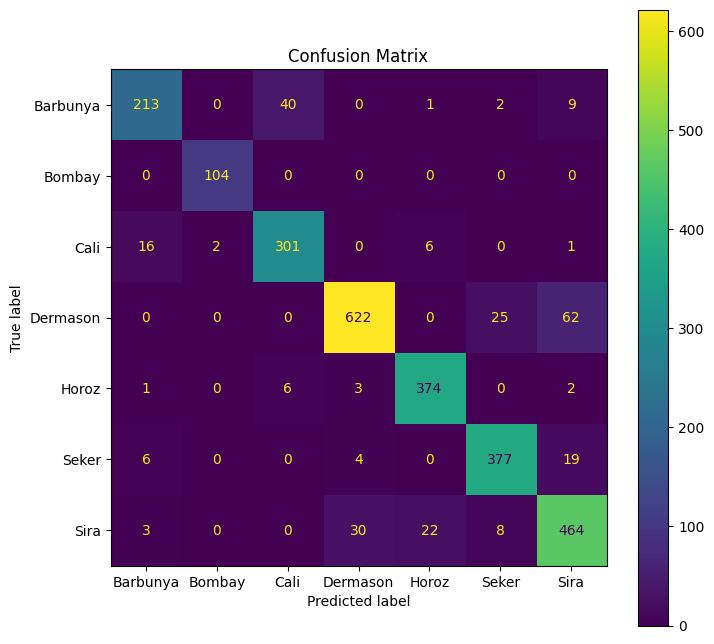

In [ ]:
# evaluating model on test set
test_predictions_gnb = model_gnb.predict(scaled_feats_test)

avg_f1_score_gnb = f1_score(target_test, test_predictions_gnb, average='macro')
f1_scores_gnb = f1_score(target_test, test_predictions_gnb, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_gnb))
print('\n The average F1 score is: '+str(avg_f1_score_gnb))


acc_gnb = accuracy_score(target_test, test_predictions_gnb)
print('\n The overall accuracy is: '+str(acc_gnb))

#store accuracy and f1 score
accuracy.append(acc_gnb)
f1score.append(avg_f1_score_gnb)
f1_per_class['GaussianNB Classifier'] = f1_scores_gnb

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_gnb, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_gnb = confusion_matrix(target_test, test_predictions_gnb)
disp = ConfusionMatrixDisplay(cm_gnb, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.5 - Support Vector Classifier

In [ ]:
# Support Vector Classifier
# hyperparameter tuning
c_options = [0.001, 0.01, 1.0, 5.0]
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
degree_options = [2,3,4,5]
gamma_options = ['scale', 'auto']
class_w_options = [None, 'balanced']
best_c = 1.0
best_k = 'rbf'
best_d = 3
best_g = 'auto'
best_cw = None
best_perf = 0

for c in c_options:
  for k in kernel_options:
    for d in degree_options:
      for g in gamma_options:
        for cw in class_w_options:
          print("\n for C = "+str(c)+ ", for kernel = "+str(k)+ ", for degree = "+str(d)+ ", for gamma = "+str(g)+ " and for class weight = "+str(cw)+"...")
          model_svc= SVC(C = c, kernel = k, degree = d, gamma = g, class_weight = cw, probability=True, random_state=random_seed)
          model_svc.fit(scaled_feats_train, target_train)
          val_pred = model_svc.predict(scaled_feats_val)

          avg_f1_score = f1_score(target_val, val_pred, average='macro')

          if avg_f1_score > best_perf:
            best_c = c
            best_k = k
            best_d = d
            best_g = g
            best_cw = cw
            best_perf = avg_f1_score

print('\n The optimal C value for this data is: '+str(best_c))
print('\n The best kernel for this data is: '+str(best_k))
print('\n The optimal degree for this data is: '+str(best_d))
print('\n The optimal gamma value for this data is: '+str(best_g))
print('\n The optimal class weight for this data is: '+str(best_cw))

# Use the optimized hyperparameter to train the final model
model_svc= SVC(C = best_c, kernel = best_k, degree = best_d, gamma = best_g, class_weight = best_cw, probability=True, random_state=random_seed)
model_svc.fit(scaled_feats_train, target_train)


 for C = 0.001, for kernel = linear, for degree = 2, for gamma = scale and for class weight = None...

 for C = 0.001, for kernel = linear, for degree = 2, for gamma = scale and for class weight = balanced...

 for C = 0.001, for kernel = linear, for degree = 2, for gamma = auto and for class weight = None...

 for C = 0.001, for kernel = linear, for degree = 2, for gamma = auto and for class weight = balanced...

 for C = 0.001, for kernel = linear, for degree = 3, for gamma = scale and for class weight = None...

 for C = 0.001, for kernel = linear, for degree = 3, for gamma = scale and for class weight = balanced...

 for C = 0.001, for kernel = linear, for degree = 3, for gamma = auto and for class weight = None...

 for C = 0.001, for kernel = linear, for degree = 3, for gamma = auto and for class weight = balanced...

 for C = 0.001, for kernel = linear, for degree = 4, for gamma = scale and for class weight = None...

 for C = 0.001, for kernel = linear, for degree = 4, for gam

SVC(degree=2, probability=True, random_state=111)

In [ ]:
# Evaluate model on the test dataset
# see prediction the test data
test_predictions_svc = model_svc.predict(scaled_feats_test)

#### EVALUATION OF SUPPORT VECTOR CLASSIFIER


 The F1 scores for each of the classes are: [0.93461538 1.         0.94817073 0.92142857 0.95618557 0.94029851
 0.87615527]

 The average F1 score is: 0.9395505757494929

 The overall accuracy is: 0.927653323540213

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.95      0.92      0.93       265
      Bombay       1.00      1.00      1.00       104
        Cali       0.94      0.95      0.95       326
    Dermason       0.93      0.91      0.92       709
       Horoz       0.95      0.96      0.96       386
       Seker       0.95      0.93      0.94       406
        Sira       0.85      0.90      0.88       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723


----------- Confusion Matrix --------------


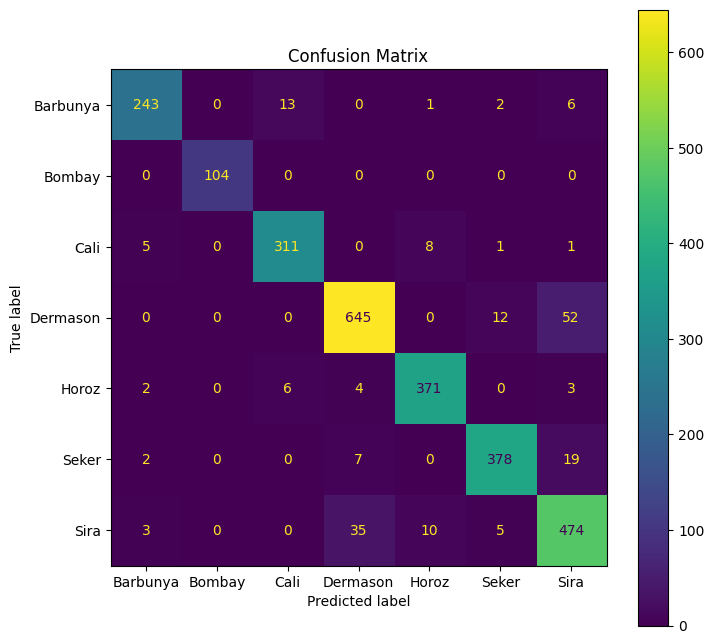

In [ ]:
avg_f1_score_svc = f1_score(target_test, test_predictions_svc, average='macro')
f1_scores_svc = f1_score(target_test, test_predictions_svc, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_svc))
print('\n The average F1 score is: '+str(avg_f1_score_svc))


acc_svc = accuracy_score(target_test, test_predictions_svc)
print('\n The overall accuracy is: '+str(acc_svc))

#store accuracy and f1-score
accuracy.append(acc_svc)
f1score.append(avg_f1_score_svc)
f1_per_class['SVC'] = f1_scores_svc

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_svc, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_svc = confusion_matrix(target_test, test_predictions_svc)
disp = ConfusionMatrixDisplay(cm_svc, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.6 - Random Forest Classifier

In [ ]:
#Random Forest Classifier
# hyperparameter tuning
estimator_options = [10,20,30,40]
criterion_options = ['gini', 'entropy', 'log_loss']
depth_options = [2,3,4,5]

class_w_options = [None, 'balanced']
best_e = 10
best_c = 'gini'
best_d = 3
best_cw = None
best_perf = 0

for e in estimator_options:
  for c in criterion_options:
    for d in depth_options:
      # for s in min_samples_split_options:
        for cw in class_w_options:
          print("\n for n_estimators = "+str(e)+ ", for criterion = "+str(c)+ ", for max_depth = "+str(d)+ " and for class_weight = "+str(cw)+"...")
          model_rfc= RandomForestClassifier(n_estimators = e, criterion = c, max_depth = d, min_samples_split = 2, class_weight = cw, verbose = 0, random_state=random_seed)
          model_rfc.fit(scaled_feats_train, target_train)
          val_pred = model_rfc.predict(scaled_feats_val)

          avg_f1_score = f1_score(target_val, val_pred, average='macro')

          if avg_f1_score > best_perf:
            best_e = e
            best_c = c
            best_d = d
            best_cw = cw
            best_perf = avg_f1_score

print('\n The optimal n_estimators value for this data is: '+str(best_e))
print('\n The best criterion for this data is: '+str(best_c))
print('\n The optimal max_depth for this data is: '+str(best_d))
print('\n The optimal class weight for this data is: '+str(best_cw))

# Use the optimized hyperparameter to train the final model
model_rfc= RandomForestClassifier(n_estimators = best_e, criterion = best_c, max_depth = best_d, min_samples_split = 2, class_weight = best_cw, verbose = 0, random_state=random_seed)
model_rfc.fit(scaled_feats_train, target_train)


 for n_estimators = 10, for criterion = gini, for max_depth = 2 and for class_weight = None...

 for n_estimators = 10, for criterion = gini, for max_depth = 2 and for class_weight = balanced...

 for n_estimators = 10, for criterion = gini, for max_depth = 3 and for class_weight = None...

 for n_estimators = 10, for criterion = gini, for max_depth = 3 and for class_weight = balanced...

 for n_estimators = 10, for criterion = gini, for max_depth = 4 and for class_weight = None...

 for n_estimators = 10, for criterion = gini, for max_depth = 4 and for class_weight = balanced...

 for n_estimators = 10, for criterion = gini, for max_depth = 5 and for class_weight = None...

 for n_estimators = 10, for criterion = gini, for max_depth = 5 and for class_weight = balanced...

 for n_estimators = 10, for criterion = entropy, for max_depth = 2 and for class_weight = None...

 for n_estimators = 10, for criterion = entropy, for max_depth = 2 and for class_weight = balanced...

 for n_estima

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=10, random_state=111)

In [ ]:
# evaluate model on the test dataset
# see prediction on the test data
test_predictions_rfc = model_rfc.predict(scaled_feats_test)

#### EVALUATION OF RANDOM FOREST CLASSIFIER


 The F1 scores for each of the classes are: [0.84356436 0.99516908 0.89387145 0.91316932 0.953125   0.92
 0.8573991 ]

 The average F1 score is: 0.9108997587788373

 The overall accuracy is: 0.9026808666911494

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.89      0.80      0.84       265
      Bombay       1.00      0.99      1.00       104
        Cali       0.87      0.92      0.89       326
    Dermason       0.94      0.89      0.91       709
       Horoz       0.96      0.95      0.95       386
       Seker       0.93      0.91      0.92       406
        Sira       0.81      0.91      0.86       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723


----------- Confusion Matrix --------------


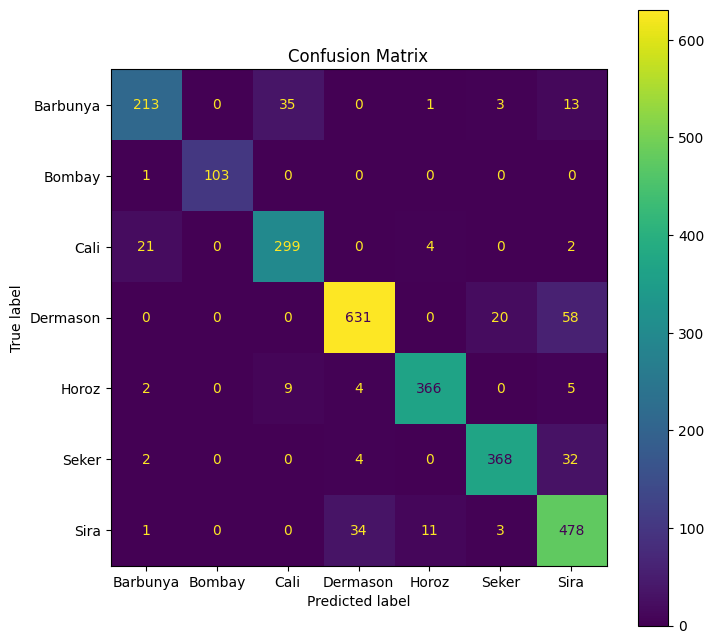

In [ ]:
avg_f1_score_rfc = f1_score(target_test, test_predictions_rfc, average='macro')
f1_scores_rfc = f1_score(target_test, test_predictions_rfc, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_rfc))
print('\n The average F1 score is: '+str(avg_f1_score_rfc))


acc_rfc = accuracy_score(target_test, test_predictions_rfc)
print('\n The overall accuracy is: '+str(acc_rfc))

# store accuracy and f1-score
accuracy.append(acc_rfc)
f1score.append(avg_f1_score_rfc)
f1_per_class['Random Forest Classifier'] = f1_scores_rfc

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_rfc, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_rfc = confusion_matrix(target_test, test_predictions_rfc)
disp = ConfusionMatrixDisplay(cm_rfc, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.7 - Decision Tree Classifier

In [ ]:
# Building decision tree classifier
# hyperparameter tuning
criterion_options = ['gini', 'entropy', 'log_loss']
splitter_options = ['best', 'random']
depth_options = [2,3,4,5]
min_samples_split_options = [2,3,4,5,6,]
class_w_options = [None, 'balanced']
best_c = 'gini'
best_split = 'random'
best_d = 3
best_s = 3
best_cw = None
best_perf = 0

for c in criterion_options:
  for split in splitter_options:
    for d in depth_options:
      for s in min_samples_split_options:
        for cw in class_w_options:
          print("\n for criterion = "+str(c)+ ", for splitter = "+str(split)+ ", for max_depth = "+str(d)+ ", for min_samples_split = "+str(s)+ " and for class_weight = "+str(cw)+"...")
          model_dtc= DecisionTreeClassifier(criterion = c, splitter = split, max_depth = d, min_samples_split = s, class_weight = cw, random_state=random_seed)
          model_dtc.fit(scaled_feats_train, target_train)
          val_pred = model_dtc.predict(scaled_feats_val)

          avg_f1_score = f1_score(target_val, val_pred, average='macro')

          if avg_f1_score > best_perf:
            best_c = c
            best_split = split
            best_d = d
            best_s = s
            best_cw = cw
            best_perf = avg_f1_score

print('\n The best criterion for this data is: '+str(best_c))
print('\n The best splitter for this data is: '+str(best_c))
print('\n The optimal max_depth for this data is: '+str(best_d))
print('\n The optimal min_samples_split value for this data is: '+str(best_s))
print('\n The optimal class_weight for this data is: '+str(best_cw))

# Use the optimized hyperparameter to train the final model
model_dtc= DecisionTreeClassifier(criterion = best_c, splitter = best_split,  max_depth = best_d, min_samples_split = best_s, class_weight = best_cw, random_state=random_seed)
model_dtc.fit(scaled_feats_train, target_train)


 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 2 and for class_weight = None...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 2 and for class_weight = balanced...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 3 and for class_weight = None...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 3 and for class_weight = balanced...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 4 and for class_weight = None...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 4 and for class_weight = balanced...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 5 and for class_weight = None...

 for criterion = gini, for splitter = best, for max_depth = 2, for min_samples_split = 5 and for class_weight = balanced...

 for criterion 

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=111)

In [ ]:
# Evaluate model on the test dataset
# see prediction on the test data
test_predictions_dtc = model_dtc.predict(scaled_feats_test)

#### EVALUATION OF DECISION TREE CLASSIFIER


 The F1 scores for each of the classes are: [0.77009346 0.99516908 0.88921713 0.92208721 0.89564069 0.9139923
 0.84432234]

 The average F1 score is: 0.8900746012421036

 The overall accuracy is: 0.8854204921042967

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.76      0.78      0.77       265
      Bombay       1.00      0.99      1.00       104
        Cali       0.86      0.92      0.89       326
    Dermason       0.93      0.91      0.92       709
       Horoz       0.91      0.88      0.90       386
       Seker       0.95      0.88      0.91       406
        Sira       0.82      0.87      0.84       527

    accuracy                           0.89      2723
   macro avg       0.89      0.89      0.89      2723
weighted avg       0.89      0.89      0.89      2723


----------- Confusion Matrix --------------


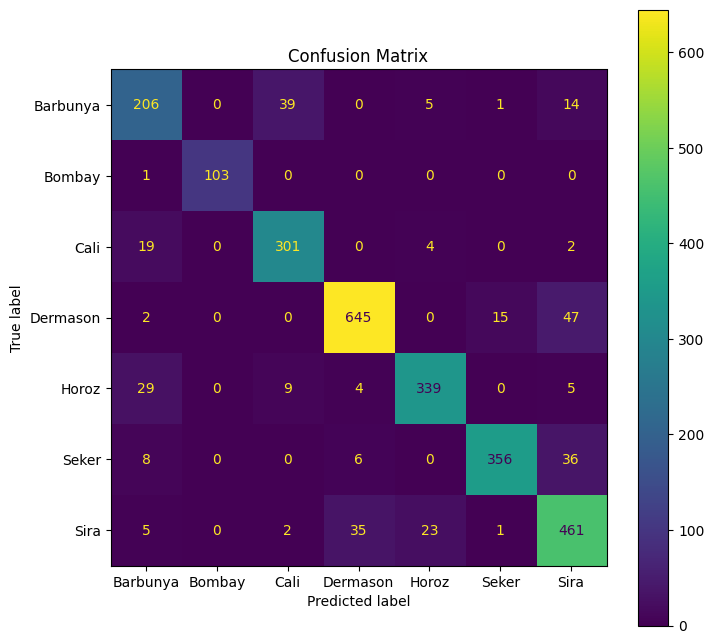

In [ ]:
avg_f1_score_dtc = f1_score(target_test, test_predictions_dtc, average='macro')
f1_scores_dtc = f1_score(target_test, test_predictions_dtc, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_dtc))
print('\n The average F1 score is: '+str(avg_f1_score_dtc))


acc_dtc = accuracy_score(target_test, test_predictions_dtc)
print('\n The overall accuracy is: '+str(acc_dtc))

# store accuracy and f1-score
accuracy.append(acc_dtc)
f1score.append(avg_f1_score_dtc)
f1_per_class['Decision Tree Classifier'] = f1_scores_dtc

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_dtc, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_dtc = confusion_matrix(target_test, test_predictions_dtc)
disp = ConfusionMatrixDisplay(cm_dtc, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.8 - XGBoostClassifier

In [ ]:
from xgboost.sklearn import XGBClassifier
# hyperparameter tuning
depth_options = [3, 4, 5, 7]
lr_options = [0.1, 0.01, 0.05]
gamma_options = [0, 0.25, 1]
reg_lmda_options = [0, 1, 10]
best_d = 3
best_lr = 0.01
best_g = 1
best_lmd = 1
best_perf = 0

for d in depth_options:
  for lr in lr_options:
    for g in gamma_options:
      for lmd in reg_lmda_options:
          print("\n for max_depth = "+str(d)+ ", for learning_rate = "+str(lr)+ ", for gamma = "+str(g)+ ", and for reg_lambda = "+str(lmd)+"...")

          model_xgb= XGBClassifier(max_depth = d, learning_rate = lr, gamma = g, reg_lambda = lmd, subsample = 0.8, colsample_bytree = 0.5,  random_state=random_seed)
          model_xgb.fit(scaled_feats_train, target_train)
          val_pred = model_xgb.predict(scaled_feats_val)

          avg_f1_score = f1_score(target_val, val_pred, average='macro')

          if avg_f1_score > best_perf:
            best_d = d
            best_lr = lr
            best_g = g
            best_lmd = lmd
            best_perf = avg_f1_score

print('\n The optimal max_depth value for this data is: '+str(best_d))
print('\n The best learning_rate for this data is: '+str(best_lr))
print('\n The optimal gamma for this data is: '+str(best_g))
print('\n The optimal reg_lambda for this data is: '+str(best_lmd))

# Use the optimized hyperparameter to train the final model
model_xgb= XGBClassifier(max_depth = best_d, learning_rate = best_lr, gamma = best_g, reg_lambda = best_lmd, subsample = 0.8, colsample_bytree = 0.5,  random_state=random_seed)
model_xgb.fit(scaled_feats_train, target_train)


 for max_depth = 3, for learning_rate = 0.1, for gamma = 0, and for reg_lambda = 0...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 0, and for reg_lambda = 1...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 0, and for reg_lambda = 10...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 0.25, and for reg_lambda = 0...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 0.25, and for reg_lambda = 1...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 0.25, and for reg_lambda = 10...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 1, and for reg_lambda = 0...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 1, and for reg_lambda = 1...

 for max_depth = 3, for learning_rate = 0.1, for gamma = 1, and for reg_lambda = 10...

 for max_depth = 3, for learning_rate = 0.01, for gamma = 0, and for reg_lambda = 0...

 for max_depth = 3, for learning_rate = 0.01, for gamma = 0, and for reg_lambda = 1...

 for max_depth = 3, for lear

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Evaluate model on the test dataset
# see prediction the test data
test_predictions_xgb = model_xgb.predict(scaled_feats_test)

#### EVALUATION OF XGBOOST CLASSIFIER


 The F1 scores for each of the classes are: [0.92720307 1.         0.93939394 0.91607397 0.95336788 0.94204686
 0.86972821]

 The average F1 score is: 0.935401987792759

 The overall accuracy is: 0.9232464193903782

----------- Classification Report --------------
              precision    recall  f1-score   support

    Barbunya       0.94      0.91      0.93       265
      Bombay       1.00      1.00      1.00       104
        Cali       0.93      0.95      0.94       326
    Dermason       0.92      0.91      0.92       709
       Horoz       0.95      0.95      0.95       386
       Seker       0.94      0.94      0.94       406
        Sira       0.86      0.88      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723


----------- Confusion Matrix --------------


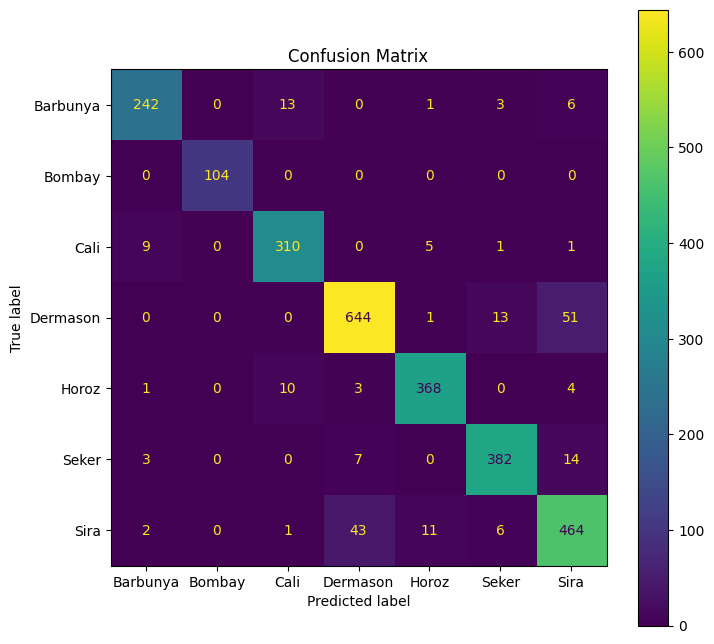

In [ ]:
avg_f1_score_xgb = f1_score(target_test, test_predictions_xgb, average='macro')
f1_scores_xgb = f1_score(target_test, test_predictions_xgb, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores_xgb))
print('\n The average F1 score is: '+str(avg_f1_score_xgb))


acc_xgb = accuracy_score(target_test, test_predictions_xgb)
print('\n The overall accuracy is: '+str(acc_xgb))

# store accuracy and f1-score
accuracy.append(acc_xgb)
f1score.append(avg_f1_score_xgb)
f1_per_class['XGBoost Classifier'] = f1_scores_xgb

print("\n----------- Classification Report --------------")
print(classification_report(target_test, test_predictions_xgb, target_names=label_types))

print("\n----------- Confusion Matrix --------------")
fig, ax = plt.subplots(figsize=(8,8))
cm_xgb = confusion_matrix(target_test, test_predictions_xgb)
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=label_types)
disp.plot(ax = ax)
plt.title("Confusion Matrix")
plt.show()

### 6.9 - ROC CURVE FOR MODELS

In [ ]:
predict_prob_mlp = model_mlp.predict_proba(scaled_feats_test)
predict_prob_lr = model_lr.predict_proba(scaled_feats_test)
predict_prob_knc = model_knc.predict_proba(scaled_feats_test)
predict_prob_gnb = model_gnb.predict_proba(scaled_feats_test)
predict_prob_svc = model_svc.predict_proba(scaled_feats_test)
predict_prob_rfc = model_rfc.predict_proba(scaled_feats_test)
predict_prob_dtc = model_dtc.predict_proba(scaled_feats_test)
predict_prob_xgb = model_xgb.predict_proba(scaled_feats_test)

In [ ]:
# roc curve for models
fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(target_test, predict_prob_mlp[:,1], pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(target_test, predict_prob_lr[:,1], pos_label=1)
fpr_knc, tpr_knc, thresh_knc = roc_curve(target_test, predict_prob_knc[:,1], pos_label=1)
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(target_test, predict_prob_gnb[:,1], pos_label=1)
fpr_svc, tpr_svc, thresh_svc = roc_curve(target_test, predict_prob_svc[:,1], pos_label=1)
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(target_test, predict_prob_rfc[:,1], pos_label=1)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(target_test, predict_prob_dtc[:,1], pos_label=1)
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(target_test, predict_prob_xgb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(target_test))]
p_fpr, p_tpr, _ = roc_curve(target_test, random_probs, pos_label=1)


In [ ]:
# auc scores
auc_score_mlp = roc_auc_score(target_test, predict_prob_mlp, multi_class = 'ovr')
auc_score_lr = roc_auc_score(target_test, predict_prob_lr, multi_class = 'ovr')
auc_score_knc = roc_auc_score(target_test, predict_prob_knc, multi_class = 'ovr')
auc_score_gnb = roc_auc_score(target_test, predict_prob_gnb, multi_class = 'ovr')
auc_score_svc = roc_auc_score(target_test, predict_prob_svc, multi_class = 'ovr')
auc_score_rfc = roc_auc_score(target_test, predict_prob_rfc, multi_class = 'ovr')
auc_score_dtc = roc_auc_score(target_test, predict_prob_dtc, multi_class = 'ovr')
auc_score_xgb = roc_auc_score(target_test, predict_prob_xgb, multi_class = 'ovr')

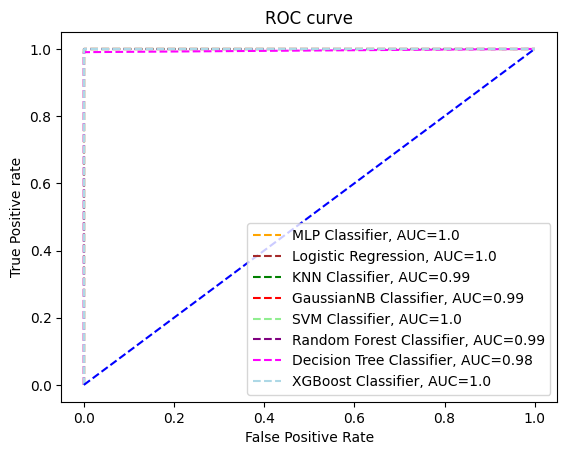

In [ ]:
# plot roc curves
plt.plot(fpr_mlp, tpr_mlp, linestyle='--',color='orange', label="MLP Classifier, AUC="+str(round(auc_score_mlp,2)))
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='brown', label="Logistic Regression, AUC="+str(round(auc_score_lr,2)))
plt.plot(fpr_knc, tpr_knc, linestyle='--',color='green', label="KNN Classifier, AUC="+str(round(auc_score_knc,2)))
plt.plot(fpr_gnb, tpr_gnb, linestyle='--',color='red', label="GaussianNB Classifier, AUC="+str(round(auc_score_gnb,2)))
plt.plot(fpr_svc, tpr_svc, linestyle='--',color='lightgreen', label="SVM Classifier, AUC="+str(round(auc_score_svc,2)))
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='purple', label="Random Forest Classifier, AUC="+str(round(auc_score_rfc,2)))
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='magenta', label="Decision Tree Classifier, AUC="+str(round(auc_score_dtc,2)))
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='lightblue', label="XGBoost Classifier, AUC="+str(round(auc_score_xgb,2)))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/ROC.jpg',dpi=300)

plt.show()

## 7 - Neural Network Approach

I will use a three-layer multilayer perceptron, i.e. a neural network that has 3 fully connected layers, with the following specifications:

*   Input size: the number of features
*   Hidden layer sizes: 100 units for each of the two hidden layers 
*   Output size: the number of label classes
*   Activation functions: ReLU activation for the two hidden layers and a softmax activation for the output layer

Q.1 What will BatchNormalization do?

Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier. the standard deviation of the neurons' output.

In [ ]:
# Code based on lab exercise with some adaptation

import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy
import random

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# creating my network class with batch normalization
class three_layer_MLP_withnorm(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = torch.relu):
        super().__init__()
        self.batchnorm = nn.BatchNorm1d(input_size)
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.batchnorm(inputs)
        x = self.hidden_l1(x)
        x = self.hidden_l2(x)
        x = self.output_l3(x)
        x = self.activation_fn(x)
        return x

# creating a function for computing performance metrics of interest
def my_metrics(labels, predictions):
    
    ## Use argmax to first work out which class has been predicted for each data sample.
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted

    predictions_numpy = predictions.detach().numpy()
    predicted_classes = np.argmax(predictions_numpy, axis=1)


    avg_f1_score = f1_score(labels, predicted_classes, average='macro')
    acc = accuracy_score(labels, predicted_classes)

    return avg_f1_score, acc

# creating a method for training a given model
def train_model(model, learning_rate, epochs, train_dataloader, val_dataloader):

  # The optimizer I'll use to update the model parameters
  # SGD = Stochastic Gradient Descent
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # Compute the loss against the training labels using the nn.CrossEntropyLoss class 
  # The cross entropy loss for Pytorch softmax activation of the output with
  # and cross entropy so we could have done without having the softmax activation
  # in our output layer (this is not necessarily the case for libraries such as TensorFlow).
  loss_function = nn.CrossEntropyLoss()

  # Set the model to training mode
  model.train()

  best_model_acc = 0
  losses = []

  # Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
  # is called an epoch.
  for epoch in range(0, num_epochs):
      if epoch == 0:  
        best_model = deepcopy(model)

      for batch, (X_train, y_train) in enumerate(train_dataloader):

        # Then the value of loss function 
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
      
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)
    
        # We need to zero out the `.grad` buffers as otherwise on the backward pass we'll add the 
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Compute the model parameters' gradients 
        # and propagate the loss backwards through the network.
        train_loss.backward()

        # Now we update the model parameters using those gradients
        optimizer.step()

      for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

      if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

      # How well the network does on the batch is an indication of how well training is 
      # progressing
      print("epoch: {} - train loss: {:5.5f} train acc: {:2.2f} val loss: {:5.5f} val acc: {:2.2f}".format(
          epoch,
          train_loss.item(),
          train_acc,
          val_loss.item(),
          val_acc

      ))

      losses.append([train_loss.item(), val_loss.item()])
    
  model = best_model

  return model, losses


def evaluate_model(model, losses, test_dataloader):
  # Finally we can test our model on the test set and get an estimate of its performance. 
  # First set the model to evaluation mode 
  model.eval()  
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)    
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    predictions = np.argmax(test_pred_numpy, axis=1)
    test_f1_scores = f1_score(y_test, predictions, average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


    print("\n Confusion matrix:")
    fig, ax = plt.subplots(figsize=(8,8))
    confusion_mat = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_mat, display_labels=label_types)
    disp.plot(ax = ax)
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = np.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss') 
    ax.plot(losses[:, 1], 'b-', label='validation loss') 
    plt.legend(loc='upper right')
  return test_avg_f1_score, test_accuracy, test_f1_scores

# A class for managing the data for training the model
class Feats_Dataset(Dataset):
    def __init__(self, feats, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
      
        return self.feats[idx, :], self.labels[idx]



 Batch size= 50

 Learning rate= 0.001

 Number of epochs= 50

 Model=3-layer MLP

 Features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.83201 train acc: 0.51 val loss: 1.81046 val acc: 0.58
epoch: 1 - train loss: 1.70289 train acc: 0.57 val loss: 1.65987 val acc: 0.56
epoch: 2 - train loss: 1.61375 train acc: 0.53 val loss: 1.55296 val acc: 0.54
epoch: 3 - train loss: 1.55091 train acc: 0.51 val loss: 1.47717 val acc: 0.54
epoch: 4 - train loss: 1.45312 train acc: 0.51 val loss: 1.37593 val acc: 0.56
Found improvement in performance. New model saved.
epoch: 5 - train loss: 1.23331 train acc: 0.69 val loss: 1.18684 val acc: 0.74
Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.06644 train acc: 0.76 val loss: 1.03845 val acc: 0.76
Found improvement in performance. New model saved.
epoch: 7 - train loss: 0.95354 train acc: 0.78 val loss: 0.92991 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 8 - train lo

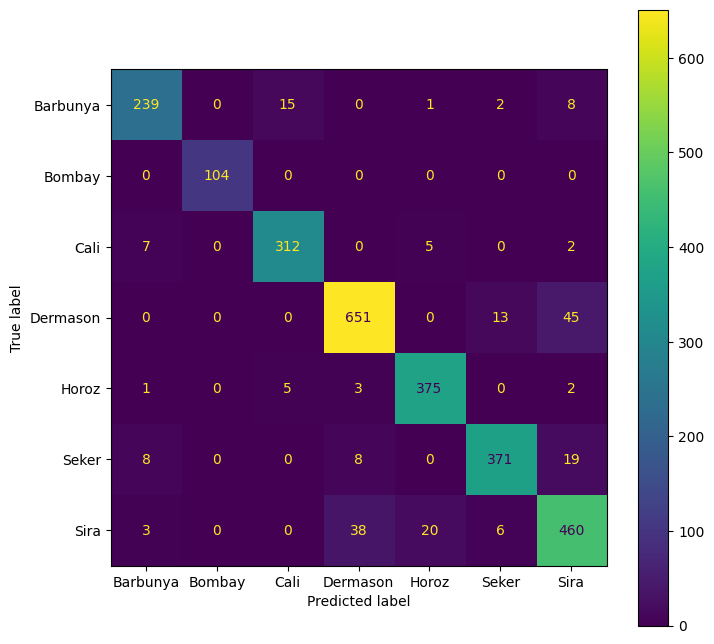


 Loss:


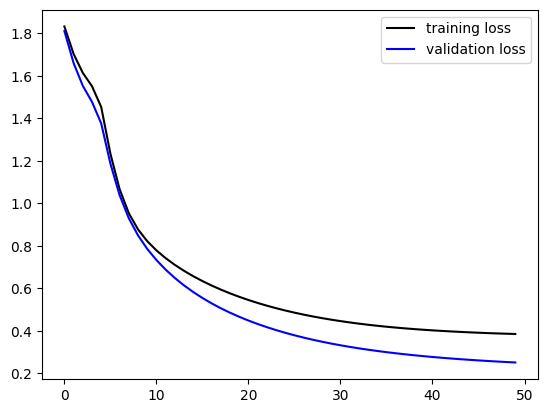

In [ ]:
# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# Create an instance of your network
feature_count = features.shape[1]
hidden_layer_sizes = [100, 100]
class_count = np.unique(target).shape[0]
three_layer_MLP_model = three_layer_MLP_withnorm(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 50
learning_rate = 0.001
batch_size = 50

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Features')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = Feats_Dataset(scaled_feats_train, 
                             target_train.to_numpy(dtype=np.float64))
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = Feats_Dataset(scaled_feats_val, 
                             target_val.to_numpy(dtype=np.float64))
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = Feats_Dataset(scaled_feats_test, 
                             target_test.to_numpy(dtype=np.float64))
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
MLP_model, losses = train_model(three_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
avg_f1_ml, acc_ml, class_f1_ml = evaluate_model(MLP_model, losses, test_dataloader)

In [ ]:
accuracy.append(acc_ml)
f1score.append(avg_f1_ml)
f1_per_class['Three_Layer_MLP'] = class_f1_ml

## 8 - Comparison of Model Performance

In [ ]:
print(accuracy)
print(f1score)
print(f1_per_class)

[0.9294895336026442, 0.9280205655526992, 0.919573999265516, 0.9015791406536908, 0.927653323540213, 0.9026808666911494, 0.8854204921042967, 0.9232464193903782, 0.9225119353654058]
[0.9406398254741216, 0.938268600272048, 0.9328206481142661, 0.9093510971042473, 0.9395505757494929, 0.9108997587788373, 0.8900746012421036, 0.935401987792759, 0.9335187820067595]
{'MLP Classifier': array([0.93436293, 1.        , 0.94242424, 0.92176387, 0.95730918,
       0.94621027, 0.88240828]), 'Logistic Regression': array([0.9245283 , 1.        , 0.94478528, 0.92759857, 0.95274585,
       0.93680297, 0.88141923]), 'K-Neighbors Classifier': array([0.92898273, 1.        , 0.94063927, 0.91233072, 0.95128205,
       0.93695921, 0.85955056]), 'GaussianNB Classifier': array([0.8452381 , 0.99047619, 0.89450223, 0.90935673, 0.94803549,
       0.92176039, 0.85608856]), 'SVC': array([0.93461538, 1.        , 0.94817073, 0.92142857, 0.95618557,
       0.94029851, 0.87615527]), 'Random Forest Classifier': array([0.84356

In [ ]:
model = ['MLP Classifier', 'LogisticRegression', 'KNeighbors Classifier', 
         'GaussianNB', 'SVC', 'RandomForest Classifier', 'DecisionTree Classifier', 'XGBClassifier', 'Three_layer_MLP']
matrics_dict = {'Accuracy': accuracy, 'F1-Score': f1score}  # 'Models': model, 

model_df = pd.DataFrame(matrics_dict.values(), columns = model).T
model_df.columns = ['Accuracy', 'F1-score']
model_df = model_df.sort_values(by = ['F1-score'], ascending = False)   # sort value according to highest f1-score 
model_df

,Accuracy,F1-score
MLP Classifier,0.929490,0.940640
SVC,0.927653,0.939551
LogisticRegression,0.928021,0.938269
XGBClassifier,0.923246,0.935402
Three_layer_MLP,0.922512,0.933519
KNeighbors Classifier,0.919574,0.932821
RandomForest Classifier,0.902681,0.910900
GaussianNB,0.901579,0.909351
DecisionTree Classifier,0.885420,0.890075


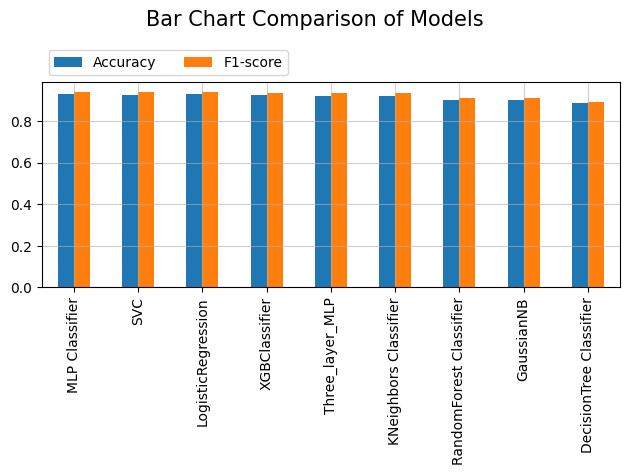

In [ ]:
ax = model_df.plot(kind = 'bar')
ax.legend(
    ncol=len(model), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.grid(alpha = 0.6)
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/comparison_models2.jpg', bbox_inches='tight')

In [ ]:
class_name = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']

f1_class_df = pd.DataFrame(f1_per_class.values(),columns=class_name, index=f1_per_class.keys()) #.sort_index()
f1_class_df

,Barbunya,Bombay,Cali,Dermason,Horoz,Seker,Sira
MLP Classifier,0.934363,1.000000,0.942424,0.921764,0.957309,0.946210,0.882408
Logistic Regression,0.924528,1.000000,0.944785,0.927599,0.952746,0.936803,0.881419
K-Neighbors Classifier,0.928983,1.000000,0.940639,0.912331,0.951282,0.936959,0.859551
GaussianNB Classifier,0.845238,0.990476,0.894502,0.909357,0.948035,0.921760,0.856089
SVC,0.934615,1.000000,0.948171,0.921429,0.956186,0.940299,0.876155
Random Forest Classifier,0.843564,0.995169,0.893871,0.913169,0.953125,0.920000,0.857399
Decision Tree Classifier,0.770093,0.995169,0.889217,0.922087,0.895641,0.913992,0.844322
XGBoost Classifier,0.927203,1.000000,0.939394,0.916074,0.953368,0.942047,0.869728
Three_Layer_MLP,0.913958,1.000000,0.948328,0.924060,0.952986,0.929825,0.865475


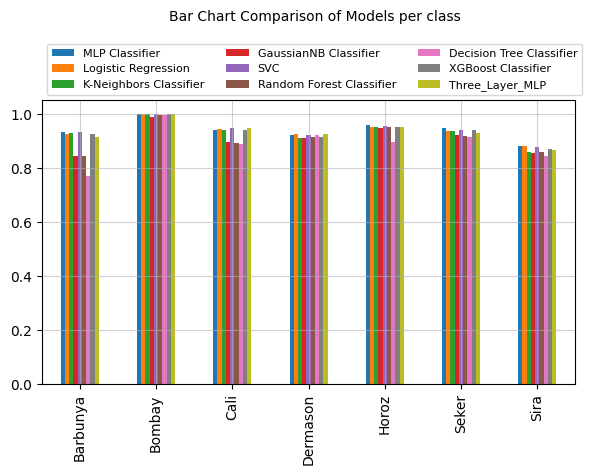

In [ ]:
#plt.figure(figsize = (10,6))
ax = f1_class_df.T.plot(kind = 'bar')
ax.legend(
    ncol = 3,
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 8}
)

plt.grid(alpha = 0.6)
plt.suptitle("Bar Chart Comparison of Models per class",fontsize=10)
plt.tight_layout()

## 9 - Saving Best Automatic Detection Output results into CSV

In [ ]:
test_predictions_mlp

array([5, 3, 5, ..., 4, 3, 3])

In [ ]:
test_ids = list(feats_test.index)


In [ ]:
# I assign the label_dict key numerical value same as I got from LabelEncoder
label_dict = {0:'Barbunya', 1:'Bombay', 2:'Cali', 3:'Dermason', 4:'Horoz', 5:'Seker', 6:'Sira'}
dict_lr = {"Test Ids":test_ids , "Predicted Class":test_predictions_mlp}
result_df = pd.DataFrame(dict_lr)

result_df

,Test Ids,Predicted Class
0,815,5
1,10112,3
2,1161,5
3,687,5
4,2035,6
...,...,...
2718,9191,6
2719,3354,1
2720,6802,4
2721,10209,3


In [ ]:
result_df = result_df.sort_values(by = ['Test Ids'], ascending = True)
result_df

,Test Ids,Predicted Class
2259,15,5
1221,30,5
1286,38,3
2469,45,5
2011,46,5
...,...,...
2315,13594,6
1941,13596,6
1757,13601,6
1671,13604,6


In [ ]:
# save the result dataframe into csv file
# result_df.to_csv("/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/classification_output_mlp.csv", index=False)

In [ ]:
# I assign the label_dict key numerical value same as I got from LabelEncoder
label_dict = {0:'Barbunya', 1:'Bombay', 2:'Cali', 3:'Dermason', 4:'Horoz', 5:'Seker', 6:'Sira'}
dict_lr = {"Test Ids":test_ids , "Predicted Class":test_predictions_mlp}
result_df1 = pd.DataFrame(dict_lr)


result_df1["Predicted Class"] = result_df1["Predicted Class"].map(label_dict)
result_df1

,Test Ids,Predicted Class
0,815,Seker
1,10112,Dermason
2,1161,Seker
3,687,Seker
4,2035,Sira
...,...,...
2718,9191,Sira
2719,3354,Bombay
2720,6802,Horoz
2721,10209,Dermason


In [ ]:
result_df1 = result_df1.sort_values(by = ['Test Ids'], ascending = True)
result_df1

,Test Ids,Predicted Class
2259,15,Seker
1221,30,Seker
1286,38,Dermason
2469,45,Seker
2011,46,Seker
...,...,...
2315,13594,Sira
1941,13596,Sira
1757,13601,Sira
1671,13604,Sira


In [ ]:
# save the result dataframe into csv file
# result_df1.to_csv("/content/drive/MyDrive/Colab Notebooks/sussex_ML/assignment/classification_output_mlp_with_name.csv", index=False)

## 10 - Conclusion

* The main purpose of this assignment was to evaluate the performance of various machine learning algorithms to automatic detection of uniform seed varieties for more crop production in the agriculture field. 
* Due to the increasing demand for good quality and uniform seed variety, the application of machine learning techniques has been guaranteed helpful to improve the quality of seed for crop production, classification of seeds, and marketing as well.



## 11 - References

1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
9. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
10. Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. Computers and Electronics in Agriculture, 174, https://doi.org/10.1016/j.compag.2020.105507
11. Build the neural network(Pytorch Tutorial) https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html